# Discriminant Analysis for Classification

In questo laboratorio studieremo l'implementazione della Linear Discriminant Analysis (LDA).

Differenze in breve tra {LDA, Quadratic Discriminant Analysis (QDA)} e {FDA, MDA}.
1. FDA e MDA sono utilizzate per proiettare i dati su uno spazio di dimensione ridotta massimizzando la separazione tra classi;
2. LDA e QDA sono utilizzate per predire la classe di appertenenza di nuovi dati. In particolare, assegnano x alla classe y che massimizza la funzione discriminante.
3. **IMPORTANTE:** LDA e QDA si basano sull'ipotesi che i dati delle classi abbiano distribuzione *NORMALE*. Nel caso della LDA si assume l'*omoschedasticità* (cioè matrice di varianza-covarianza uguale per ogni classe), nel caso della QDA si assume l'*eteroschedasticità* (cioè la matrice di varianza-covarianza è diversa per ogni classe).

**Osservazione:** LDA può essere utilizzata per implementare anche una riduzione di dimensionalità simile alla FDA (la useremo ma non la tratteremo). I due metodi si somigliano molto; in particolare, la riduzione di dimensionalità effettuata tramite LDA è equivalente (a meno di un fattore di scala) alla FDA sotto le ipotesi di normalità ed omoschedasticità.

In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
#%matplotlib widget
#
#
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from FisherDA import MultipleFisherDiscriminantAnalysis as MDA

## Importazione Dataset Wine

Importiamo il dataset "wine" di scikit-learn come visto nei laboratori precedenti.

In [5]:
wine_dataset = datasets.load_wine(as_frame=True)

wine = pd.concat([wine_dataset['data'], wine_dataset['target']], axis=1)

# Preparazione dataset: Separazione features da targets.
X = wine_dataset['data'].values
y = wine_dataset['target'].values

display(wine)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## La Funzione 'train_test_split' di Scikit-Learn

La funzione *train_test_split* di sklearn permette di usare poche righe di codice per dividere un dataset in training e test set.

**Esercizio:** leggi la documentazione della funzione al link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. Dopodiché, completa il codice della cella seguente.

In [9]:
random_seed = 20210422  # Random seed caratterizzante la suddivisione in training e test set
test_p = 0.45  # Percentuale di dati da utilizzare come test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_p, random_state=random_seed, shuffle=True)

**Utilizzo del Training Set e del Test Set:** come dicono i loro stessi nomi, i dati del training set saranno utilizzati per l'*addestramento* dei metodi predittivi, mentre i dati del test set per misurare l'affidabilità dei metodi utilizzati.

## LDA e Wine

**Esercizio:** leggere la documentazione della classe LinearDiscriminantAnalysis (https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) e completare il codice della cella seguente.

**Suggerimento:** per completare la cella, concentrarsi sulla documentazione dei metodi della classe.

In [10]:
# Inizializzazione oggetto LDA
lda = LDA()

# "Addestramento" dell'oggetto LDA rispetto a X_train e y_train
lda.fit(X_train, y_train)

# Calcoliamo il vettore delle classi predette rispetto ai dati del test set
y_pred = lda.predict(X_test)
# Calcoliamo la matrice che, per ogni riga, nella colonna j indica la probabilità di appartenenza alla classe (j-1) 
y_pred_proba = lda.predict_proba(X_test)

# Creiamo un DataFrame (solo per estetica) da y_pred e y_pred_proba
y_pred_df = pd.DataFrame({'Pred. Class': y_pred, 
                          'P(Class 0) - %': np.round(y_pred_proba[:, 0] * 100, decimals=2), 
                          'P(Class 1) - %': np.round(y_pred_proba[:, 1] * 100, decimals=2), 
                          'P(Class 2) - %': np.round(y_pred_proba[:, 2] * 100, decimals=2)})

# Calcoliamo l'accuratezza della predizione sul training e sul test set e creiamo un apposito DataFrame (solo per estetica)
scores_dict = {'Training Set': lda.score(X_train, y_train), 'Test Set': lda.score(X_test, y_test)}
scores = pd.DataFrame(scores_dict, index=['Accuracy'])

display(scores)

display(y_pred_df)


,Training Set,Test Set
Accuracy,1.0,0.987654


,Pred. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %
0,1,0.00,100.00,0.0
1,0,99.26,0.74,0.0
2,1,0.00,100.00,0.0
3,0,99.99,0.01,0.0
4,2,0.00,0.00,100.0
...,...,...,...,...
76,1,0.00,100.00,0.0
77,0,100.00,0.00,0.0
78,2,0.00,0.00,100.0
79,2,0.00,0.00,100.0


### Confronto Rappresentazione 2D tra LDA e FDA

Vediamo la differenza tra LDA e FDA nel proiettare su $\mathbb{R}^2$ i dati.

**Esercizio:** Completare il codice nella cella seguente.

/Users/edovay/Documents/code/Python/MIA/.MIA/lib/python3.7/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'LDA')

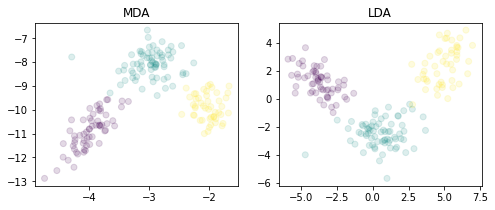

In [11]:
# Preparazione MDA (per correttezza fatta solo rispetto il training set, come LDA)
mda = MDA()  # Per la proiezione su 2 dimensioni
mda.fit(X_train, y_train)

# Calcolo dei dati in R^2 rispetto FDA e LDA
Zmda = mda.transform(X)
Zlda = lda.transform(X)

# Plot a confronto
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].scatter(Zmda[:, 0], Zmda[:, 1], c=y, alpha=0.15)
axs[0].set_title('MDA')
axs[1].scatter(Zlda[:, 0], Zlda[:, 1], c=y, alpha=0.15)
axs[1].set_title('LDA')

#### LDA e Minima Distanza da Spazio Generato dalle Medie

La classificazione effettuata dalla LDA è equivalente ad una classificazione fatta proiettando i dati sullo spazio generato dai vettori medi delle classi (di dimensione c-1) e identificando il centroide più vicino.

**Osservazione 1:** Nel caso dei vini abbiamo 3 classi, quindi questo equivale a cercare la più vicina proiezione su $\mathbb{R}^2$ del vettor medio di una delle classi. In caso di più di 3 classi, la visualizzazione in $\mathbb{R}^2$ non avrebbe necessariamente avuto le stesse caratteristiche.

**Osservazione 2:** La classificazione con LDA, a differenza di quella basata sulla distanza dal centroide, esprime anche 

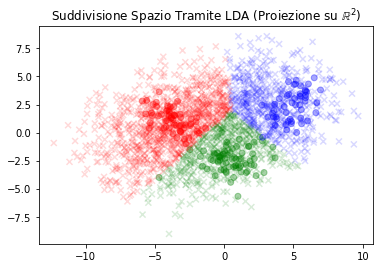

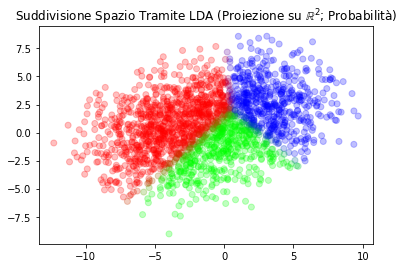

In [12]:
X_min = wine.describe().loc['min', :].values[:-1]
X_max = wine.describe().loc['max', :].values[:-1]
X_range = X_max - X_min

colors = ['red', 'green', 'blue']
y_colors = [colors[i] for i in y]

n_samples = 2000

Xrand = X_min + X_range * np.random.rand(n_samples, X_range.size)
yrand_pred = lda.predict(Xrand)
yrand_proba = lda.predict_proba(Xrand)
Zrand = lda.transform(Xrand)

yrand_pred_colors = [colors[i] for i in yrand_pred]

fig1 = plt.figure()
plt.scatter(Zlda[:, 0], Zlda[:, 1], c=y_colors, alpha=0.35)
plt.scatter(Zrand[:, 0], Zrand[:, 1], c=yrand_pred_colors, alpha=0.15, marker='x')
plt.title('Suddivisione Spazio Tramite LDA (Proiezione su $\mathbb{R}^2$)')
plt.show()

fig2 = plt.figure()
plt.scatter(Zrand[:, 0], Zrand[:, 1], c=yrand_proba, alpha=0.25)
plt.title('Suddivisione Spazio Tramite LDA (Proiezione su $\mathbb{R}^2$; Probabilità)')
plt.show()